# Data Science 2 (modeling)

## Computer-exam BFVM19DATASC2 '19-'20 (practice)

**Teachers:**

* Graph theory: Martijn Herber (HEMI)

* Numerical analysis: Dave Langers (LADR)

* Multivariate data analysis: Tsjerk Wassenaar (WATS)

**Files:**

* *None*

**Supplementary materials:**

* Graph theory: -

* Numerical analysis: Jupyter notebooks, book chapters

* Multivariate data analysis: -

All notes, textbooks and other written reference materials are permitted.

**Instructions:**

On your computer desktop you will find all data files and supplementary materials, as well as the submit script `submit_your_work`. First fill in your name and student number below:

In [1]:
# YOUR NAME:   Djakim Latumalea
# YOUR ST.NR.: 345419

This exam consists of three parts that can in principle be answered separately. Provide your answers in the code cells corresponding with each of the questions below. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment or you may write your answer on paper (in that case, write `# SEE PAPER` in the code cell).

<div class="alert alert-warning">
<img src="attachment:exclamation_icon.png" align="right"/>
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Export your notebook as an HTML-file using the menu option `File` > `Download as` > `HTML (.html)` > `Save`, and move the downloaded file from the `Downloads` to the `Desktop` folder.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and type `submit_your_work --help` to get help on submit script usage.
</li><li>
Submit both your `*.ipynb` and `*.html` file together.
</li><li>
If you gave written answers on paper, write your name and student number on the form and hand it in.
</li></ol>
</div>

All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

***

## Part I: Graph theory

<small>Each question in this section is worth 5 points.</small>

#### Question 1a

Bla bla bla

***

## Part II: Numerical analysis

<small>Each question in this section is worth 5 points.</small>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#### Question 1a

Use Romberg integration to calculate the integral

$$
\int_{-1}^{+1} \left( 2 - x^2 \right) \text{d}x
$$

by hand. Perform two iterations and report the exact values of the approximants $R_{0,0}$ and $R_{1,0}$ as well as the final result $R_{1,1}$ in the form of an integer or fraction.

In [3]:
R00 = 2
R10 = 3
R11 = 10/3

#### Question 1b

The gamma-function $\Gamma(x)$ is defined in the `scipy.special` module, as plotted below. It is closely related to the factorial, since for nonnegative integers $n$ the following relation holds: $\Gamma(n+1) = n!$; however, $\Gamma(x)$ is also defined for other real (or complex) values $x$.

Use numeric differentiation to compute the first- and second-order derivatives $\Gamma'(x)$ and $\Gamma''(x)$ at $x=1$ with an accuracy of at least four decimals.

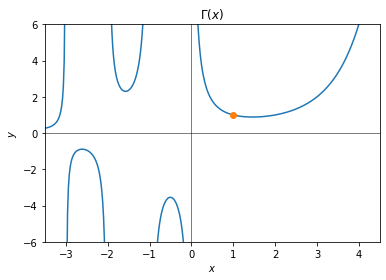

In [4]:
from scipy.special import gamma
xs = np.linspace(-3.5, 4.5, 401)
plt.plot(xs, gamma(xs), '-', 1.0, gamma(1.0), 'o')
plt.axis([-3.5, 4.5, -6.0, 6.0]); plt.axhline(0.0, color='k', linewidth=.5); plt.axvline(0.0, color='k', linewidth=.5)
plt.title('$\Gamma(x)$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

In [5]:
from scipy.misc import derivative

In [6]:
dx1 = derivative(gamma, 1, dx=1e-4, n=1)
dx2 = derivative(gamma, 1, dx=1e-4, n=2)

print('Gamma(1) order 1: {:.4f}'.format(dx1))
print('Gamma(1) order 2: {:.4f}'.format(dx2))

Gamma(1) order 1: -0.5772
Gamma(1) order 2: 1.9781


In [7]:
def forward_derivative(f, x, h=1000):
    """df = forward_derivative(f, x, h).
    Calculates the forward difference approximation of the
    function f(x).
    """
    df = (f(x + h) - f(x)) / h
    return df

def backward_derivative(f, x, h=1000):
    """df = forward_derivative(f, x, h).
    Calculates the backward difference approximation of the
    function f(x).
    """
    df = (f(x) - f(x - h)) / h
    return df

def central_derivative(f, x, h=1000):
    """df = central_derivative(f, x, h).
    Calculates the central difference approximation of the
    function f(x).
    """
    df = (f(x + h) - f(x - h)) / (2 * h)
    return df

def central_derivative2(f, x, h=1000):
    """df = central_derivative2(f, x, h).
    Calculates the second-order derivative of the
    function f(x).
    """
    ddf = (f(x+h) - 2*f(x) + f(x-h)) / h**2
    return ddf

print(central_derivative(gamma, 1, h=1e-4))
print(central_derivative2(gamma, 1, h=1e-4))

-0.5772156739780598
1.978111985323494


#### Question 1c

The *Midpoint method* is an algorithm from the Runge-Kutta family that shares the first two formulas with the Runge-Kutta method itself:

$$
\begin{aligned}
\boldsymbol{k}_0 &= h \cdot \boldsymbol{f}(x, \boldsymbol{y}(x))
\\
\boldsymbol{k}_1 &= h \cdot \boldsymbol{f}(x + \frac{1}{2} h, \boldsymbol{y}(x + \frac{1}{2} \boldsymbol{k}_0))
\end{aligned}
$$

but then updates the value of $\boldsymbol{y}$ according to

$$
\boldsymbol{y}(x + h) \approx \boldsymbol{y}(x) + \boldsymbol{k}_1
$$

Write a dedicated function `midpoint(f, y0, x0, x1, steps)` that applies the Midpoint method to compute $\boldsymbol{y}(x_1)$ by integrating the differential equation $\boldsymbol{y}' = \boldsymbol{f}(x, \boldsymbol{y})$ from initial condition $\boldsymbol{y}(x_0) = \boldsymbol{y}_0$ in a given number of steps.

Apply your function to numerically integrate the first-order differential equation

$$
y'(x) = -\frac{2}{3} x \cdot y(x)
$$

from $x_0 = -2$ to $x_1 = +1$ with starting value $y(x_0) = 1$ in 1000 steps, and report the outcome.

<div class="alert alert-info">**Hint:**<br />The exact solution can be shown to equal $y(x_1) = \text{e} \approx 2.71828\ldots$</div>

In [8]:
def midpoint(f, y0, x0, x1, steps):
    """
    c = [0, 1]
    q = 1/2
    """
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h*f(x, y)
        k1 = h*f(x + h/2, y + k0/2)
        
        y = y + k1
        
        ys.append(y)
        
    return xs, ys

In [9]:
f = lambda x, y: -2/3*x*y

x0, x1, y0 = -2, 1, 1

xs, ys = midpoint(f, y0, x0, x1, 1000)

print('y(1) = {:.4f}'.format(ys[-1]))

y(1) = 2.7183


#### Question 1d

Compute *all* zero roots of the function $g(x) = \frac{1}{20} x^2 + \sin(x)$, as plotted below. Report your answer(s) with an accuracy of (at least) six correct decimals. Explicitly investigate whether the function has any zeroes near $x=4\frac{1}{4}$ (indicated with the plotted circle).

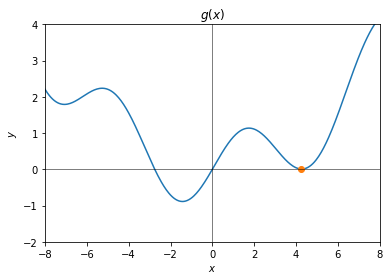

In [10]:
g = lambda x: (x*x) / 20.0 + np.sin(x)
xs = np.linspace(-8.0, 8.0, 401)
plt.plot(xs, g(xs), '-', 4.25, 0.0, 'o')
plt.axis([-8.0, 8.0, -2.0, 4.0]); plt.axhline(0.0, color='k', linewidth=.5); plt.axvline(0.0, color='k', linewidth=.5)
plt.title('$g(x)$'); plt.xlabel('$x$'); plt.ylabel('$y$'); plt.show()

In [11]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps # window width
    f_lo = f(a) # first value
    for step in range(steps):
        lo = a + step * h # 
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi
        
def secant(f, a, b, tol=1e-8):
    x1 = a
    x2 = b
    
    fx1 = f(a)
    fx2 = f(b)
    
    while abs(x2 - x1) > tol:
        x3 = x2 - fx2 * (x2 - x1) / (fx2 - fx1)
        fx3 = f(x3)
        
        x1, x2 = x2, x3
        fx1, fx2 = fx2, fx3
        
    return x2

In [12]:
g = lambda x: (x*x) / 20.0 + np.sin(x)

xs = np.linspace(-8, 8, 401)

roots = []
for a, b in rootsearch(g, -8, 8, 1000):
    root = secant(g, a, b, tol=1e-8)
    roots.append(root)
    print('Root found at x={:.6f}'.format(root))

Root found at x=-2.752947
Root found at x=0.000000


In [13]:
g(roots[0])

-2.220446049250313e-16

In [14]:
# inspecting zeroes near x=4*1/4
xs = np.linspace(4, 4.5, 401)
ys = g(xs)

minidx = ys.argmin()
ymin = ys[minidx]
xmin = xs[minidx]

print('The lowest value in a range between x=4 and x=4.5 is y={:.6f} at x={:.6f}'.format(ymin, xmin))
# This value is not 0, and therefore not a root, and there is no sign change
# according to the visualisation

The lowest value in a range between x=4 and x=4.5 is y=0.007913 at x=4.271250


***

## Part III: Multivariate data analysis

<small>Each question in this section is worth 10 points.</small>

#### Question 3a

Bla bla bla

***

## End of this exam

Success!